In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from pandas.plotting import scatter_matrix
import os

In [2]:
% matplotlib inline

In [3]:
df = pd.read_pickle('../PklJar/dftides.pkl')

In [4]:
df.units = {'move': 'm/s'}

In [5]:
dfDaily= df.drop(['HiLo', 'timeDiffHrs'], axis=1).resample('D')

In [6]:
dfmax = dfDaily.max()
dfmax.rename(columns={'%s' % coln: '%s_max' % coln for coln in dfmax.columns}, inplace=True)

dfmin = dfDaily.min()
dfmin.rename(columns={'%s' % coln: '%s_min' % coln for coln in dfmin.columns}, inplace=True)

dfstd = dfDaily.std()
dfstd.rename(columns={'%s' % coln: '%s_std' % coln for coln in dfstd.columns}, inplace=True)

dfmed = dfDaily.median()
dfmed.rename(columns={'%s' % coln: '%s_med' % coln for coln in dfmed.columns}, inplace=True)

In [7]:
dfDaily = pd.concat((dfmin, dfmax, dfstd, dfmed), axis=1)

In [10]:
dfDaily.iloc[:,:5].head()

,Pred_min,ampDiff_min,vel_min,move_min,Pred_max
Date_Time,,,,,
1999-01-01,-0.46,-3.90,-0.607792,3.47,3.44
1999-01-02,-0.47,-3.91,-0.610938,3.15,3.44
1999-01-03,-0.44,-3.85,-0.604712,3.14,3.41
1999-01-04,-0.36,-3.69,-0.579581,3.09,3.33
1999-01-05,-0.25,-3.47,-0.549340,2.99,3.22


/home/madhatter106/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


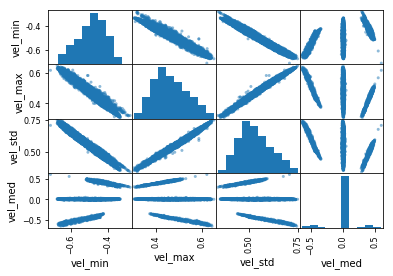

In [12]:
pd.scatter_matrix(dfDaily.filter(like='vel', axis=1));

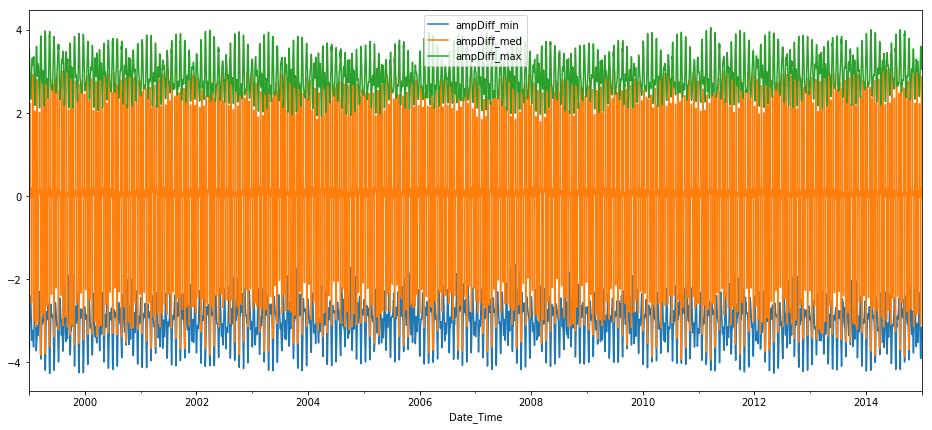

In [20]:
var = 'ampDiff'
dfDaily.plot(y=['%s_min' % var, '%s_med' % var, '%s_max' % var], figsize=(16,7));

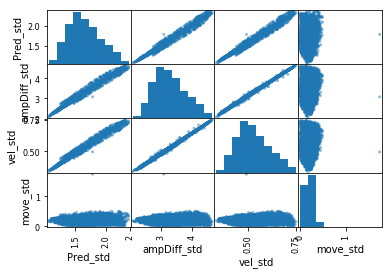

In [23]:
scatter_matrix(dfDaily.filter(like='std', axis=1));

In [24]:
dfDaily.to_pickle('../PklJar/dfTidesDaily.pkl')